In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import pandas as pd
import nelpy as nel
from scipy.signal import find_peaks
from reactivation import AssemblyReact, load_cell_metrics, load_epochs, load_ripples_events, load_SleepState_states, load_spikes, event_triggered_average_fast

## A015_day12

### Loading

In [4]:
project_path='D:/Research Topic/tristan/step10_olivadata'

mice_name_A015_day12 = 'A015_day12'

assembly_react_A015_day12 = AssemblyReact(
    project_path=project_path,
    mice_name= mice_name_A015_day12,
    brainRegion="CA2-CA3",
    putativeCellType="pyr",
    z_mat_dt=0.025,
    )

#swr= load_ripples_events('D:/Research Topic/tristan/step10_olivadata', 'A015_day12')

In [5]:
assembly_react_A015_day12.load_data()
assembly_react_A015_day12

C:\Users\ASUS\anaconda3\lib\site-packages\nelpy\core\_eventarray.py:996: UserWarning: ignoring events outside of eventarray support


<AssemblyReact: 20 units> of length 4:12:53:383 hours

In [6]:
assembly_react_A015_day12.restrict_epochs_to_pre_task_post()

### Peak Assembly reactivation A015_day12

In [8]:
assembly_react_A015_day12.epoch_df

,Cage_or_Maze,Start_Time,End_Time
4,rest_pre,7968.70,10526.90
5,2novel_exposure,10526.90,10816.55
7,rest_post2,11100.15,14932.15


In [9]:
assembly_react_A015_day12.st

<SpikeTrainArray at 0x21b87d87670: 20 units (9 segments)> at 30000 Hz

In [10]:
#assembly_react_A015_day12.cell_metrics

In [11]:
state_dict_A015_day12 = load_SleepState_states(project_path, mice_name_A015_day12)

wake_epoch = nel.EpochArray(
    state_dict_A015_day12["WAKEepisode"],
)

nrem_epochs = nel.EpochArray(
    state_dict_A015_day12["NREMepisode"],
)


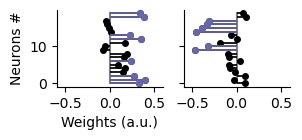

In [12]:
assembly_react_A015_day12.get_weights(epoch= assembly_react_A015_day12.epochs[1] & wake_epoch)
assembly_react_A015_day12.plot()
plt.show()

In [13]:
assembly_act_pre_A015_day12 = assembly_react_A015_day12.get_assembly_act(assembly_react_A015_day12.epochs[0] & nrem_epochs) 
assembly_act_pre_A015_day12

C:\Users\ASUS\anaconda3\lib\site-packages\nelpy\core\_analogsignalarray.py:420: UserWarning: creating support from abscissa_vals and sampling rate, fs!
C:\Users\ASUS\anaconda3\lib\site-packages\nelpy\utils.py:842: UserWarning: some steps in the data are smaller than the requested step size.


<AnalogSignalArray at 0x21b890e2740: 2 signals (2 segments)> for a total of 19:57 minutes

In [14]:
assembly_act_post_A015_day12 = assembly_react_A015_day12.get_assembly_act(assembly_react_A015_day12.epochs[2] & nrem_epochs) 
assembly_act_post_A015_day12

C:\Users\ASUS\anaconda3\lib\site-packages\nelpy\core\_analogsignalarray.py:420: UserWarning: creating support from abscissa_vals and sampling rate, fs!
C:\Users\ASUS\anaconda3\lib\site-packages\nelpy\utils.py:842: UserWarning: some steps in the data are smaller than the requested step size.


<AnalogSignalArray at 0x21b87d8c6d0: 2 signals (3 segments)> for a total of 27:27 minutes

In [15]:
assembly_act_pre_A015_day12.data

array([[ 0.24592017,  0.24592017,  0.24592017, ...,  0.24392171,
        -0.56101031,  0.69878617],
       [ 0.14383068,  0.14383068,  0.14383068, ...,  0.1433301 ,
        -0.05917993, -1.696219  ]])

In [16]:
assembly_act_post_A015_day12.data

array([[ 0.24094165,  0.24186881,  0.6111287 , ...,  0.23909864,
         0.23820605, -1.31201317],
       [ 0.17281433,  0.16901856, -1.35248722, ...,  0.17229851,
         0.16948211, -0.73435611]])

In [17]:
act_pre_sleep_above_A015_day12 = np.where(assembly_act_pre_A015_day12.data[:] > 5, assembly_act_pre_A015_day12.data[:], 0)
act_pre_sleep_above_A015_day12

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [18]:
act_post_sleep_above_A015_day12 = np.where(assembly_act_post_A015_day12.data[:] > 5, assembly_act_post_A015_day12.data[:], 0)
act_post_sleep_above_A015_day12[0]

array([0., 0., 0., ..., 0., 0., 0.])

In [19]:
act_pre_sleep_above_A015_day12

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [20]:
act_pre_sleep_above_A015_day12_test = act_pre_sleep_above_A015_day12
assembly_act_post_A015_day12_test = act_post_sleep_above_A015_day12
sampling_rate = 1  # Replace with actual rate

# Define the duration of each bin in seconds
bin_duration = 60

def compute_peak_averages(data):
    bin_size = bin_duration * sampling_rate
    bins = np.array_split(data, len(data) // bin_size)
    bin_means = [np.mean(bin_data) for bin_data in bins]
    return np.array(bin_means)
    

reactivation_rates = []

for pre_sleep_data, post_sleep_data in zip(act_pre_sleep_above_A015_day12_test, assembly_act_post_A015_day12_test):
    # Compute peak averages for the current pair of sessions
    pre_sleep_peak_averages = compute_peak_averages(pre_sleep_data)
    post_sleep_peak_averages = compute_peak_averages(post_sleep_data)
    
    # Average reactivation strengths
    avg_pre_sleep_reactivation = np.mean(pre_sleep_peak_averages)
    avg_post_sleep_reactivation = np.mean(post_sleep_peak_averages)
    
    # Overall average peak reactivation strength for normalization
    all_peak_averages = np.concatenate((pre_sleep_peak_averages, post_sleep_peak_averages))
    overall_average_reactivation = np.mean(all_peak_averages)
    
    # Calculate the reactivation strength difference and normalize
    reactivation_strength_difference = (avg_post_sleep_reactivation - avg_pre_sleep_reactivation)
    
    # Avoid division by zero if there are no peaks detected in both sessions
    if overall_average_reactivation != 0:
        normalized_reactivation_strength_difference = reactivation_strength_difference / overall_average_reactivation
    else:
        normalized_reactivation_strength_difference = 0
    
    reactivation_rates.append(normalized_reactivation_strength_difference)

# The reactivation_rates list now contains the reactivation rate for each pair of pre-sleep and post-sleep arrays
print("Reactivation Rates:", reactivation_rates)

Reactivation Rates: [0.06947948396189098, 0.08059156745836411]


In [21]:
Peak_reactivation_Joint_A015_day12 = reactivation_rates[0]
Peak_reactivation_Joint_A015_day12

0.06947948396189098

## A015_day8

### Loading data

In [24]:
project_path='D:/Research Topic/tristan/step10_olivadata'

mice_name = 'A015_day8'

assembly_react_A015_day8 = AssemblyReact(
    project_path=project_path,
    mice_name= mice_name,
    brainRegion="CA2-CA3",
    putativeCellType="pyr",
    z_mat_dt=0.025,
    )

#swr= load_ripples_events('D:/Research Topic/tristan/step10_olivadata', 'A015_day8')

In [25]:
assembly_react_A015_day8.load_data()
assembly_react_A015_day8

C:\Users\ASUS\anaconda3\lib\site-packages\nelpy\core\_eventarray.py:996: UserWarning: ignoring events outside of eventarray support


<AssemblyReact: 17 units> of length 2:14:32:983 hours

In [26]:
assembly_react_A015_day8.restrict_epochs_to_pre_task_post()

In [27]:
assembly_react_A015_day8.epoch_df

,Cage_or_Maze,Start_Time,End_Time
4,rest_pre,2315.666667,4884.883333
5,2novel_exposure,4884.883333,5105.450000
7,rest_post2,5295.633333,7846.250000


In [28]:
assembly_react_A015_day8.st

<SpikeTrainArray at 0x21b8911f190: 17 units (9 segments)> at 30000 Hz

In [29]:
assembly_react_A015_day8.cell_metrics

,Type,Region,Modulation,CluID
8,pyr,CA2,positive,8
13,pyr,CA2,positive,13
16,pyr,CA2,positive,16
17,pyr,CA2,positive,17
20,pyr,CA2,positive,20
0,pyr,CA3,positive,0
1,pyr,CA3,positive,1
4,pyr,CA3,positive,4
5,pyr,CA3,positive,5
6,pyr,CA3,negative,6


In [30]:
state_dict_A015_day8 = load_SleepState_states(project_path, mice_name)

wake_epoch = nel.EpochArray(
    state_dict_A015_day8["WAKEstate"],
)

nrem_epochs = nel.EpochArray(
    state_dict_A015_day8["NREMstate"],
)


### Peak Reactivation strength

In [32]:
#assembly_react_A015_day8.get_weights(epoch= assembly_react_A015_day8.epochs[1])
#assembly_react_A015_day8.plot()
#plt.show()

In [33]:
#assembly_react_A015_day8.find_members()

In [34]:
#assembly_act_pre_A015_day8 = assembly_react_A015_day8.get_assembly_act(assembly_react_A015_day8.epochs[0] & nrem_epochs) 
#assembly_act_pre_A015_day8

In [35]:
#assembly_act_post_A015_day8 = assembly_react_A015_day8.get_assembly_act(assembly_react_A015_day8.epochs[2] & nrem_epochs) 
#assembly_act_post_A015_day8

In [36]:
#act_pre_sleep_above_A015_day8 = np.where(assembly_act_pre_A015_day8.data[:] > 5, assembly_act_pre_A015_day8.data[:], 0)
#act_pre_sleep_above_A015_day8

In [37]:
#act_post_sleep_above_A015_day8 = np.where(assembly_act_post_A015_day8.data[:] > 5, assembly_act_post_A015_day8.data[:], 0)
#act_post_sleep_above_A015_day8

In [38]:
#Peak_reactivation_Joint_A015_day8 = np.mean(act_post_sleep_above_A015_day8[0]) - np.mean(act_pre_sleep_above_A015_day8[0])
#Peak_reactivation_Joint_A015_day8

## AO13_day7

### Loading

In [41]:
project_path='D:/Research Topic/tristan/step10_olivadata'

mice_name = 'A013_day7'

assembly_react_A013_day7 = AssemblyReact(
    project_path=project_path,
    mice_name= mice_name,
    brainRegion="CA2-CA3",
    putativeCellType="pyr",
    z_mat_dt=0.025,
    )


In [42]:
assembly_react_A013_day7.load_data()
assembly_react_A013_day7

C:\Users\ASUS\anaconda3\lib\site-packages\nelpy\core\_eventarray.py:996: UserWarning: ignoring events outside of eventarray support


<AssemblyReact: 30 units> of length 3:17:28:083 hours

In [43]:
assembly_react_A013_day7.restrict_epochs_to_pre_task_post()

In [44]:
assembly_react_A013_day7.epoch_df

,Cage_or_Maze,Start_Time,End_Time
4,rest_pre,4803.033333,5598.166667
5,2novel_exposure,5598.166667,5954.583333
7,rest_post2,6203.716667,10313.616667


In [45]:
assembly_react_A013_day7.st

<SpikeTrainArray at 0x21b8a443430: 30 units (10 segments)> at 30000 Hz

In [46]:
assembly_react_A013_day7.cell_metrics

,Type,Region,Modulation,CluID
1,pyr,CA2,positive,1
3,pyr,CA2,positive,3
4,pyr,CA2,positive,4
6,pyr,CA2,positive,6
8,pyr,CA2,positive,8
9,pyr,CA2,negative,9
17,pyr,CA2,negative,17
18,pyr,CA2,positive,18
19,pyr,CA2,negative,19
20,pyr,CA2,negative,20


In [47]:
state_dict_A013_day7 = load_SleepState_states(project_path, mice_name)

wake_epoch = nel.EpochArray(
    state_dict_A013_day7["WAKEepisode"],
)

nrem_epochs = nel.EpochArray(
    state_dict_A013_day7["NREMepisode"],
)


### Peak reactivation

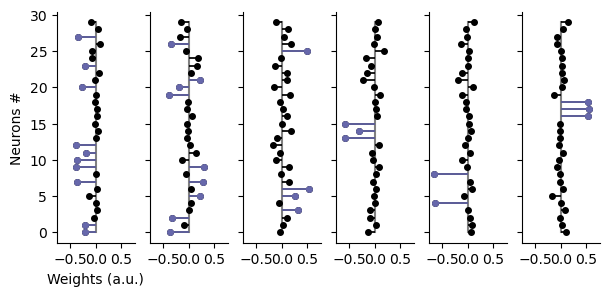

In [49]:
assembly_react_A013_day7.get_weights(epoch= assembly_react_A013_day7.epochs[1] & wake_epoch)
assembly_react_A013_day7.plot()
plt.show()

In [50]:
assembly_act_pre_A013_day7 = assembly_react_A013_day7.get_assembly_act(assembly_react_A013_day7.epochs[0] & nrem_epochs) 
assembly_act_pre_A013_day7

C:\Users\ASUS\anaconda3\lib\site-packages\nelpy\core\_analogsignalarray.py:420: UserWarning: creating support from abscissa_vals and sampling rate, fs!
C:\Users\ASUS\anaconda3\lib\site-packages\nelpy\utils.py:842: UserWarning: some steps in the data are smaller than the requested step size.


<AnalogSignalArray at 0x21b89b07400: 6 signals (3 segments)> for a total of 7:40 minutes

In [51]:
assembly_act_post_A013_day7 = assembly_react_A013_day7.get_assembly_act(assembly_react_A013_day7.epochs[2] & nrem_epochs) 
assembly_act_post_A013_day7

C:\Users\ASUS\anaconda3\lib\site-packages\nelpy\core\_analogsignalarray.py:420: UserWarning: creating support from abscissa_vals and sampling rate, fs!
C:\Users\ASUS\anaconda3\lib\site-packages\nelpy\utils.py:842: UserWarning: some steps in the data are smaller than the requested step size.


<AnalogSignalArray at 0x21b8911f3a0: 6 signals (2 segments)> for a total of 1:05:14:875 hours

In [52]:
act_pre_sleep_above_A013_day7 = np.where(assembly_act_pre_A013_day7.data[:] > 5, assembly_act_pre_A013_day7.data[:], 0)
act_post_sleep_above_A013_day7 = np.where(assembly_act_post_A013_day7.data[:] > 5, assembly_act_post_A013_day7.data[:], 0)

In [53]:
act_pre_sleep_above_A013_day7_test = act_pre_sleep_above_A013_day7
assembly_act_post_A013_day7_test = act_post_sleep_above_A013_day7
sampling_rate = 1  # Replace with actual rate

# Define the duration of each bin in seconds
bin_duration = 60
reactivation_rates_A013_day7 = []

for pre_sleep_data, post_sleep_data in zip(act_pre_sleep_above_A013_day7_test, assembly_act_post_A013_day7_test):
    # Compute peak averages for the current pair of sessions
    pre_sleep_peak_averages = compute_peak_averages(pre_sleep_data)
    post_sleep_peak_averages = compute_peak_averages(post_sleep_data)
    
    # Average reactivation strengths
    avg_pre_sleep_reactivation = np.mean(pre_sleep_peak_averages)
    avg_post_sleep_reactivation = np.mean(post_sleep_peak_averages)
    
    # Overall average peak reactivation strength for normalization
    all_peak_averages = np.concatenate((pre_sleep_peak_averages, post_sleep_peak_averages))
    overall_average_reactivation = np.mean(all_peak_averages)
    
    # Calculate the reactivation strength difference and normalize
    reactivation_strength_difference = (avg_post_sleep_reactivation - avg_pre_sleep_reactivation)
    
    # Avoid division by zero if there are no peaks detected in both sessions
    if overall_average_reactivation != 0:
        normalized_reactivation_strength_difference = reactivation_strength_difference / overall_average_reactivation
    else:
        normalized_reactivation_strength_difference = 0
    
    reactivation_rates_A013_day7.append(normalized_reactivation_strength_difference)

# The reactivation_rates list now contains the reactivation rate for each pair of pre-sleep and post-sleep arrays
print("Reactivation Rates:", reactivation_rates_A013_day7)

Reactivation Rates: [0.29890035295887857, -0.04557948866417958, 0.37155990316280496, 0.2630996726338623, -0.24926244172527892, 0.2176521915758094]


In [54]:
Peak_reactivation_Joint_A013_day7 = reactivation_rates_A013_day7[0:3]
Peak_reactivation_Joint_A013_day7

[0.29890035295887857, -0.04557948866417958, 0.37155990316280496]

In [55]:
Peak_reactivation_CA2_A013_day7 = reactivation_rates_A013_day7[3:]
Peak_reactivation_CA2_A013_day7

[0.2630996726338623, -0.24926244172527892, 0.2176521915758094]

## A013_day15

In [57]:
project_path='D:/Research Topic/tristan/step10_olivadata'

mice_name = 'A013_day15'

assembly_react_A013_day15 = AssemblyReact(
    project_path=project_path,
    mice_name= mice_name,
    brainRegion="CA2",
    putativeCellType="pyr",
    z_mat_dt=0.025,
    )

In [58]:
assembly_react_A013_day15.load_data()
assembly_react_A013_day15

C:\Users\ASUS\anaconda3\lib\site-packages\nelpy\core\_eventarray.py:996: UserWarning: ignoring events outside of eventarray support


<AssemblyReact: 52 units> of length 4:57:37:533 hours

In [59]:
assembly_react_A013_day15.restrict_epochs_to_pre_task_post()

In [60]:
assembly_react_A013_day15.epoch_df

,Cage_or_Maze,Start_Time,End_Time
4,rest_pre,3907.066667,6102.083333
5,2novel_exposure,6102.083333,6344.233333
7,rest_post2,6572.450000,10804.400000


In [61]:
assembly_react_A013_day15.st

<SpikeTrainArray at 0x21b89b423b0: 52 units (10 segments)> at 30000 Hz

In [62]:
state_dict_A013_day15 = load_SleepState_states(project_path, mice_name)

wake_epoch = nel.EpochArray(
    state_dict_A013_day15["WAKEepisode"],
)

nrem_epochs = nel.EpochArray(
    state_dict_A013_day15["NREMepisode"],
)


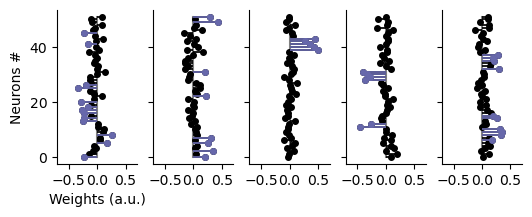

In [63]:
assembly_react_A013_day15.get_weights(epoch= assembly_react_A013_day15.epochs[1] & wake_epoch)
assembly_react_A013_day15.plot()
plt.show()

In [64]:
assembly_act_pre_A013_day15 = assembly_react_A013_day15.get_assembly_act(assembly_react_A013_day15.epochs[0] & nrem_epochs) 
assembly_act_post_A013_day15 = assembly_react_A013_day15.get_assembly_act(assembly_react_A013_day15.epochs[2] & nrem_epochs) 
act_pre_sleep_above_A013_day15 = np.where(assembly_act_pre_A013_day15.data[:] > 5, assembly_act_pre_A013_day15.data[:], 0)
act_post_sleep_above_A013_day15 = np.where(assembly_act_post_A013_day15.data[:] > 5, assembly_act_post_A013_day15.data[:], 0)

C:\Users\ASUS\anaconda3\lib\site-packages\nelpy\core\_analogsignalarray.py:420: UserWarning: creating support from abscissa_vals and sampling rate, fs!
C:\Users\ASUS\anaconda3\lib\site-packages\nelpy\utils.py:842: UserWarning: some steps in the data are smaller than the requested step size.
C:\Users\ASUS\anaconda3\lib\site-packages\nelpy\core\_analogsignalarray.py:420: UserWarning: creating support from abscissa_vals and sampling rate, fs!
C:\Users\ASUS\anaconda3\lib\site-packages\nelpy\utils.py:842: UserWarning: some steps in the data are smaller than the requested step size.


In [65]:

sampling_rate = 1  # Replace with actual rate

# Define the duration of each bin in seconds
bin_duration = 60
reactivation_rates_A013_day15 = []

for pre_sleep_data, post_sleep_data in zip(act_pre_sleep_above_A013_day15, act_post_sleep_above_A013_day15):
    # Compute peak averages for the current pair of sessions
    pre_sleep_peak_averages = compute_peak_averages(pre_sleep_data)
    post_sleep_peak_averages = compute_peak_averages(post_sleep_data)
    
    # Average reactivation strengths
    avg_pre_sleep_reactivation = np.mean(pre_sleep_peak_averages)
    avg_post_sleep_reactivation = np.mean(post_sleep_peak_averages)
    
    # Overall average peak reactivation strength for normalization
    all_peak_averages = np.concatenate((pre_sleep_peak_averages, post_sleep_peak_averages))
    overall_average_reactivation = np.mean(all_peak_averages)
    
    # Calculate the reactivation strength difference and normalize
    reactivation_strength_difference = (avg_post_sleep_reactivation - avg_pre_sleep_reactivation)
    
    # Avoid division by zero if there are no peaks detected in both sessions
    if overall_average_reactivation != 0:
        normalized_reactivation_strength_difference = reactivation_strength_difference / overall_average_reactivation
    else:
        normalized_reactivation_strength_difference = 0
    
    reactivation_rates_A013_day15.append(normalized_reactivation_strength_difference)

# The reactivation_rates list now contains the reactivation rate for each pair of pre-sleep and post-sleep arrays
print("Reactivation Rates:", reactivation_rates_A013_day15)

Reactivation Rates: [0.28784963427529714, -0.053465930921220706, 0.057149133833485334, 0.1811033722279208, 0.25848439118891825]


In [66]:
Peak_reactivation_CA2_A013_day15 = reactivation_rates_A013_day15
Peak_reactivation_CA2_A013_day15

[0.28784963427529714,
 -0.053465930921220706,
 0.057149133833485334,
 0.1811033722279208,
 0.25848439118891825]

## A013_day13

In [68]:
project_path='D:/Research Topic/tristan/step10_olivadata'

mice_name = 'A013_day13'

assembly_react_A013_day13 = AssemblyReact(
    project_path=project_path,
    mice_name= mice_name,
    brainRegion="CA2",
    putativeCellType="pyr",
    z_mat_dt=0.025,
    )

In [69]:
assembly_react_A013_day13.load_data()
assembly_react_A013_day13

C:\Users\ASUS\anaconda3\lib\site-packages\nelpy\core\_eventarray.py:996: UserWarning: ignoring events outside of eventarray support


<AssemblyReact: 46 units> of length 3:17:07:583 hours

In [70]:
assembly_react_A013_day13.restrict_epochs_to_pre_task_post()

In [71]:
assembly_react_A013_day13.epoch_df

,Cage_or_Maze,Start_Time,End_Time
4,rest_pre,4557.216667,8314.366667
5,2novel_exposure,8314.366667,8569.333333
7,rest_post2,8820.266667,11501.800000


In [72]:
assembly_react_A013_day13.st

<SpikeTrainArray at 0x21b88fa9300: 46 units (9 segments)> at 30000 Hz

In [73]:
state_dict_A013_day13 = load_SleepState_states(project_path, mice_name)

wake_epoch = nel.EpochArray(
    state_dict_A013_day13["WAKEepisode"],
)

nrem_epochs = nel.EpochArray(
    state_dict_A013_day13["NREMepisode"],
)

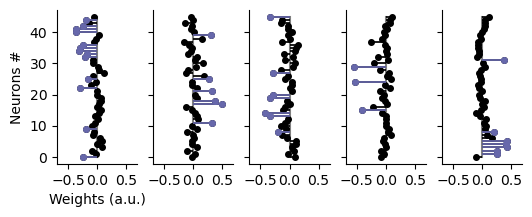

In [74]:
assembly_react_A013_day13.get_weights(epoch= assembly_react_A013_day13.epochs[1] & wake_epoch)
assembly_react_A013_day13.plot()
plt.show()

In [75]:
assembly_act_pre_A013_day13 = assembly_react_A013_day13.get_assembly_act(assembly_react_A013_day13.epochs[0] & nrem_epochs) 
assembly_act_post_A013_day13 = assembly_react_A013_day13.get_assembly_act(assembly_react_A013_day13.epochs[2] & nrem_epochs) 
act_pre_sleep_above_A013_day13 = np.where(assembly_act_pre_A013_day13.data[:] > 5, assembly_act_pre_A013_day13.data[:], 0)
act_post_sleep_above_A013_day13 = np.where(assembly_act_post_A013_day13.data[:] > 5, assembly_act_post_A013_day13.data[:], 0)

C:\Users\ASUS\anaconda3\lib\site-packages\nelpy\core\_analogsignalarray.py:420: UserWarning: creating support from abscissa_vals and sampling rate, fs!
C:\Users\ASUS\anaconda3\lib\site-packages\nelpy\utils.py:842: UserWarning: some steps in the data are smaller than the requested step size.
C:\Users\ASUS\anaconda3\lib\site-packages\nelpy\core\_analogsignalarray.py:420: UserWarning: creating support from abscissa_vals and sampling rate, fs!
C:\Users\ASUS\anaconda3\lib\site-packages\nelpy\utils.py:842: UserWarning: some steps in the data are smaller than the requested step size.


In [76]:
sampling_rate = 1  # Replace with actual rate

# Define the duration of each bin in seconds
bin_duration = 60
reactivation_rates_A013_day13 = []

for pre_sleep_data, post_sleep_data in zip(act_pre_sleep_above_A013_day13, act_post_sleep_above_A013_day13):
    # Compute peak averages for the current pair of sessions
    pre_sleep_peak_averages = compute_peak_averages(pre_sleep_data)
    post_sleep_peak_averages = compute_peak_averages(post_sleep_data)
    
    # Average reactivation strengths
    avg_pre_sleep_reactivation = np.mean(pre_sleep_peak_averages)
    avg_post_sleep_reactivation = np.mean(post_sleep_peak_averages)
    
    # Overall average peak reactivation strength for normalization
    all_peak_averages = np.concatenate((pre_sleep_peak_averages, post_sleep_peak_averages))
    overall_average_reactivation = np.mean(all_peak_averages)
    
    # Calculate the reactivation strength difference and normalize
    reactivation_strength_difference = (avg_post_sleep_reactivation - avg_pre_sleep_reactivation)
    
    # Avoid division by zero if there are no peaks detected in both sessions
    if overall_average_reactivation != 0:
        normalized_reactivation_strength_difference = reactivation_strength_difference / overall_average_reactivation
    else:
        normalized_reactivation_strength_difference = 0
    
    reactivation_rates_A013_day13.append(normalized_reactivation_strength_difference)

# The reactivation_rates list now contains the reactivation rate for each pair of pre-sleep and post-sleep arrays
print("Reactivation Rates:", reactivation_rates_A013_day13)

Reactivation Rates: [0.0560211536016921, -0.18975687088745094, -0.10351863317044314, 0.05507283863800106, -0.006882449600860075]


In [77]:
Peak_reactivation_CA2_A013_day13 = reactivation_rates_A013_day13

## A012_day15


In [79]:
project_path='D:/Research Topic/tristan/step10_olivadata'

mice_name = 'A012_day15'

assembly_react_A012_day15 = AssemblyReact(
    project_path=project_path,
    mice_name= mice_name,
    brainRegion="CA2-CA1",
    putativeCellType="pyr",
    z_mat_dt=0.025,
    )

In [80]:
assembly_react_A012_day15.load_data()
assembly_react_A012_day15

C:\Users\ASUS\anaconda3\lib\site-packages\nelpy\core\_eventarray.py:996: UserWarning: ignoring events outside of eventarray support


<AssemblyReact: 84 units> of length 5:13:52:900 hours

In [81]:
assembly_react_A012_day15.restrict_epochs_to_pre_task_post()

In [82]:
assembly_react_A012_day15.epoch_df

,Cage_or_Maze,Start_Time,End_Time
4,rest_pre,4319.833333,6962.466667
5,2novel_exposure,6962.466667,7207.216667
7,rest_post2,7509.900000,12106.666667


In [83]:
assembly_react_A012_day15.st

<SpikeTrainArray at 0x21b992716f0: 84 units (10 segments)> at 30000 Hz

In [84]:
#x = assembly_react_A012_day15.cell_metrics
#x[0:29]

In [85]:
state_dict_A012_day15 = load_SleepState_states(project_path, mice_name)

wake_epoch = nel.EpochArray(
    state_dict_A012_day15["WAKEepisode"],
)

nrem_epochs = nel.EpochArray(
    state_dict_A012_day15["NREMepisode"],
)

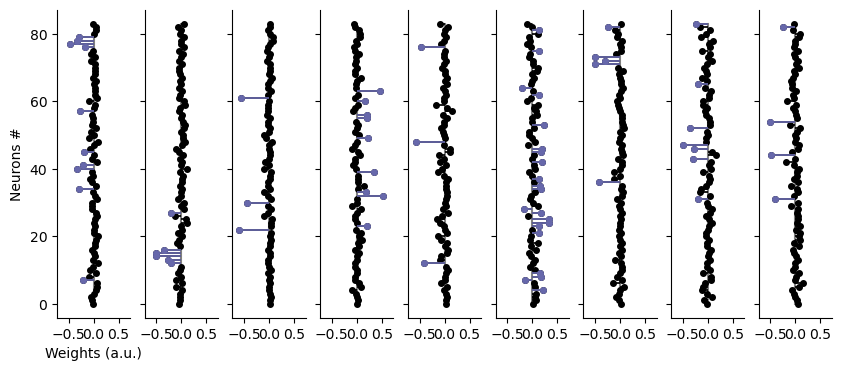

In [86]:
assembly_react_A012_day15.get_weights(epoch= assembly_react_A012_day15.epochs[1] & wake_epoch)
assembly_react_A012_day15.plot()
plt.show()

In [87]:
assembly_act_pre_A012_day15 = assembly_react_A012_day15.get_assembly_act(assembly_react_A012_day15.epochs[0] & nrem_epochs) 
assembly_act_post_A012_day15 = assembly_react_A012_day15.get_assembly_act(assembly_react_A012_day15.epochs[2] & nrem_epochs) 
act_pre_sleep_above_A012_day15 = np.where(assembly_act_pre_A012_day15.data[:] > 5, assembly_act_pre_A012_day15.data[:], 0)
act_post_sleep_above_A012_day15 = np.where(assembly_act_post_A012_day15.data[:] > 5, assembly_act_post_A012_day15.data[:], 0)

C:\Users\ASUS\anaconda3\lib\site-packages\nelpy\core\_analogsignalarray.py:420: UserWarning: creating support from abscissa_vals and sampling rate, fs!
C:\Users\ASUS\anaconda3\lib\site-packages\nelpy\utils.py:842: UserWarning: some steps in the data are smaller than the requested step size.
C:\Users\ASUS\anaconda3\lib\site-packages\nelpy\core\_analogsignalarray.py:420: UserWarning: creating support from abscissa_vals and sampling rate, fs!
C:\Users\ASUS\anaconda3\lib\site-packages\nelpy\utils.py:842: UserWarning: some steps in the data are smaller than the requested step size.


In [88]:
sampling_rate = 1  # Replace with actual rate

# Define the duration of each bin in seconds
bin_duration = 60
reactivation_rates_A012_day15 = []

for pre_sleep_data, post_sleep_data in zip(act_pre_sleep_above_A012_day15, act_post_sleep_above_A012_day15):
    # Compute peak averages for the current pair of sessions
    pre_sleep_peak_averages = compute_peak_averages(pre_sleep_data)
    post_sleep_peak_averages = compute_peak_averages(post_sleep_data)
    
    # Average reactivation strengths
    avg_pre_sleep_reactivation = np.mean(pre_sleep_peak_averages)
    avg_post_sleep_reactivation = np.mean(post_sleep_peak_averages)
    
    # Overall average peak reactivation strength for normalization
    all_peak_averages = np.concatenate((pre_sleep_peak_averages, post_sleep_peak_averages))
    overall_average_reactivation = np.mean(all_peak_averages)
    
    # Calculate the reactivation strength difference and normalize
    reactivation_strength_difference = (avg_post_sleep_reactivation - avg_pre_sleep_reactivation)
    
    # Avoid division by zero if there are no peaks detected in both sessions
    if overall_average_reactivation != 0:
        normalized_reactivation_strength_difference = reactivation_strength_difference / overall_average_reactivation
    else:
        normalized_reactivation_strength_difference = 0
    
    reactivation_rates_A012_day15.append(normalized_reactivation_strength_difference)

# The reactivation_rates list now contains the reactivation rate for each pair of pre-sleep and post-sleep arrays
print("Reactivation Rates:", reactivation_rates_A012_day15)

Reactivation Rates: [0.01907799778351327, 1.8039345571021022, 1.8641923542581582, 0.7500394587591549, -1.7857142857142858, 0.6152642678519273, 2.1289762326176858, 0.09906101834702535, 0.6198254777119151]


In [89]:
reactivation_rates_A012_day15[0]

0.01907799778351327

In [90]:
num_ass = 9
Peak_reactivation_CA2_A012_day15 = []  
Peak_reactivation_CA1_A012_day15 = []
Peak_reactivation_JointCA1_CA2_A012_day15 = []

for i in range(num_ass):
    x = reactivation_rates_A012_day15[i]
    if i == 1:
        Peak_reactivation_CA2_A012_day15.append(x)
    elif i in {6, 7, 8}:
        Peak_reactivation_CA1_A012_day15.append(x)
    else:
        Peak_reactivation_JointCA1_CA2_A012_day15.append(x)

Peak_reactivation_JointCA1_CA2_A012_day15, Peak_reactivation_CA1_A012_day15, Peak_reactivation_CA2_A012_day15

([0.01907799778351327,
  1.8641923542581582,
  0.7500394587591549,
  -1.7857142857142858,
  0.6152642678519273],
 [2.1289762326176858, 0.09906101834702535, 0.6198254777119151],
 [1.8039345571021022])

## A010_day26


In [92]:
project_path='D:/Research Topic/tristan/step10_olivadata'

mice_name = 'A010_day26'

assembly_react_A010_day26 = AssemblyReact(
    project_path=project_path,
    mice_name= mice_name,
    brainRegion="CA2-CA1",
    putativeCellType="pyr",
    z_mat_dt=0.025,
    )

In [93]:
assembly_react_A010_day26.load_data()
assembly_react_A010_day26

C:\Users\ASUS\anaconda3\lib\site-packages\nelpy\core\_eventarray.py:996: UserWarning: ignoring events outside of eventarray support


<AssemblyReact: 26 units> of length 5:06:05:050 hours

In [94]:
assembly_react_A010_day26.restrict_epochs_to_pre_task_post()

In [95]:
assembly_react_A010_day26.epoch_df

,Cage_or_Maze,Start_Time,End_Time
4,rest_pre,8177.133333,12620.85
5,2novel_exposure,12620.850000,12920.05
7,rest_post2,13236.200000,15553.10


In [96]:
assembly_react_A010_day26.st

<SpikeTrainArray at 0x21b88f31150: 26 units (10 segments)> at 30000 Hz

In [97]:
x = assembly_react_A010_day26.cell_metrics
x[24:26]

,Type,Region,Modulation,CluID
1,pyr,CA1,negative,1
32,pyr,CA1,positive,32


In [98]:
state_dict_A010_day26 = load_SleepState_states(project_path, mice_name)

wake_epoch = nel.EpochArray(
    state_dict_A010_day26["WAKEepisode"],
)

nrem_epochs = nel.EpochArray(
    state_dict_A010_day26["NREMepisode"],
)

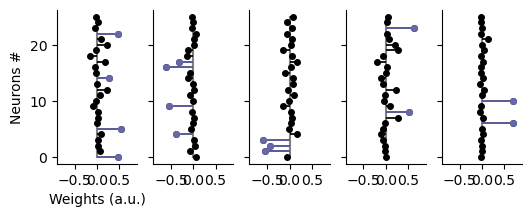

In [99]:
assembly_react_A010_day26.get_weights(epoch= assembly_react_A010_day26.epochs[1] & wake_epoch)
assembly_react_A010_day26.plot()
plt.show()

In [100]:
assembly_act_pre_A010_day26 = assembly_react_A010_day26.get_assembly_act(assembly_react_A010_day26.epochs[0] & nrem_epochs) 
assembly_act_post_A010_day26 = assembly_react_A010_day26.get_assembly_act(assembly_react_A010_day26.epochs[2] & nrem_epochs) 
act_pre_sleep_above_A010_day26 = np.where(assembly_act_pre_A010_day26.data[:] > 5, assembly_act_pre_A010_day26.data[:], 0)
act_post_sleep_above_A010_day26 = np.where(assembly_act_post_A010_day26.data[:] > 5, assembly_act_post_A010_day26.data[:], 0)

C:\Users\ASUS\anaconda3\lib\site-packages\nelpy\core\_analogsignalarray.py:420: UserWarning: creating support from abscissa_vals and sampling rate, fs!
C:\Users\ASUS\anaconda3\lib\site-packages\nelpy\utils.py:842: UserWarning: some steps in the data are smaller than the requested step size.
C:\Users\ASUS\anaconda3\lib\site-packages\nelpy\core\_analogsignalarray.py:420: UserWarning: creating support from abscissa_vals and sampling rate, fs!
C:\Users\ASUS\anaconda3\lib\site-packages\nelpy\utils.py:842: UserWarning: some steps in the data are smaller than the requested step size.


In [101]:
sampling_rate = 1  # Replace with actual rate

# Define the duration of each bin in seconds
bin_duration = 60
reactivation_rates_A010_day26 = []

for pre_sleep_data, post_sleep_data in zip(act_pre_sleep_above_A010_day26, act_post_sleep_above_A010_day26):
    # Compute peak averages for the current pair of sessions
    pre_sleep_peak_averages = compute_peak_averages(pre_sleep_data)
    post_sleep_peak_averages = compute_peak_averages(post_sleep_data)
    
    # Average reactivation strengths
    avg_pre_sleep_reactivation = np.mean(pre_sleep_peak_averages)
    avg_post_sleep_reactivation = np.mean(post_sleep_peak_averages)
    
    # Overall average peak reactivation strength for normalization
    all_peak_averages = np.concatenate((pre_sleep_peak_averages, post_sleep_peak_averages))
    overall_average_reactivation = np.mean(all_peak_averages)
    
    # Calculate the reactivation strength difference and normalize
    reactivation_strength_difference = (avg_post_sleep_reactivation - avg_pre_sleep_reactivation)
    
    # Avoid division by zero if there are no peaks detected in both sessions
    if overall_average_reactivation != 0:
        normalized_reactivation_strength_difference = reactivation_strength_difference / overall_average_reactivation
    else:
        normalized_reactivation_strength_difference = 0
    
    reactivation_rates_A010_day26.append(normalized_reactivation_strength_difference)

# The reactivation_rates list now contains the reactivation rate for each pair of pre-sleep and post-sleep arrays
print("Reactivation Rates:", reactivation_rates_A010_day26)

Reactivation Rates: [-0.10289201116867411, -0.060178114589213356, 0.0473029383851538, 0.06106566484486109, 0.19885171566305923]


In [102]:
Peak_reactivation_CA2_A010_day26 = reactivation_rates_A010_day26

## A010_day14

In [104]:
project_path='D:/Research Topic/tristan/step10_olivadata'

mice_name = 'A010_day14'

assembly_react_A010_day14 = AssemblyReact(
    project_path=project_path,
    mice_name= mice_name,
    brainRegion="CA2-CA1",
    putativeCellType="pyr",
    z_mat_dt=0.025,
    )

In [105]:
assembly_react_A010_day14.load_data()
assembly_react_A010_day14

C:\Users\ASUS\anaconda3\lib\site-packages\nelpy\core\_eventarray.py:996: UserWarning: ignoring events outside of eventarray support


<AssemblyReact: 34 units> of length 7:28:53:100 hours

In [106]:
assembly_react_A010_day14.restrict_epochs_to_pre_task_post()

In [107]:
assembly_react_A010_day14.epoch_df

,Cage_or_Maze,Start_Time,End_Time
4,rest_pre,9647.350000,16040.783333
5,2novel_exposure,16040.783333,16652.183333
7,rest_post2,17231.616667,22221.733333


In [108]:
assembly_react_A010_day14.st

<SpikeTrainArray at 0x21b8a442440: 34 units (10 segments)> at 30000 Hz

In [109]:
assembly_react_A010_day14.cell_metrics

,Type,Region,Modulation,CluID
0,pyr,CA2,positive,0
1,pyr,CA2,positive,1
2,pyr,CA2,positive,2
3,pyr,CA2,positive,3
4,pyr,CA2,positive,4
5,pyr,CA2,positive,5
6,pyr,CA2,positive,6
8,pyr,CA2,positive,8
11,pyr,CA2,positive,11
13,pyr,CA2,positive,13


In [110]:
state_dict_A010_day14 = load_SleepState_states(project_path, mice_name)

wake_epoch = nel.EpochArray(
    state_dict_A010_day14["WAKEepisode"],
)

nrem_epochs = nel.EpochArray(
    state_dict_A010_day14["NREMepisode"],
)

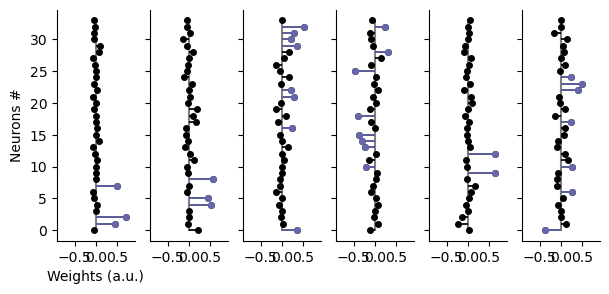

In [111]:
assembly_react_A010_day14.get_weights(epoch= assembly_react_A010_day14.epochs[1] & wake_epoch)
assembly_react_A010_day14.plot()
plt.show()

In [112]:
assembly_act_pre_A010_day14 = assembly_react_A010_day14.get_assembly_act(assembly_react_A010_day14.epochs[0] & nrem_epochs) 
assembly_act_post_A010_day14 = assembly_react_A010_day14.get_assembly_act(assembly_react_A010_day14.epochs[2] & nrem_epochs) 
act_pre_sleep_above_A010_day14 = np.where(assembly_act_pre_A010_day14.data[:] > 5, assembly_act_pre_A010_day14.data[:], 0)
act_post_sleep_above_A010_day14 = np.where(assembly_act_post_A010_day14.data[:] > 5, assembly_act_post_A010_day14.data[:], 0)

C:\Users\ASUS\anaconda3\lib\site-packages\nelpy\core\_analogsignalarray.py:420: UserWarning: creating support from abscissa_vals and sampling rate, fs!
C:\Users\ASUS\anaconda3\lib\site-packages\nelpy\utils.py:842: UserWarning: some steps in the data are smaller than the requested step size.
C:\Users\ASUS\anaconda3\lib\site-packages\nelpy\core\_analogsignalarray.py:420: UserWarning: creating support from abscissa_vals and sampling rate, fs!
C:\Users\ASUS\anaconda3\lib\site-packages\nelpy\utils.py:842: UserWarning: some steps in the data are smaller than the requested step size.


In [113]:
sampling_rate = 1  # Replace with actual rate

# Define the duration of each bin in seconds
bin_duration = 60
reactivation_rates_A010_day14 = []

for pre_sleep_data, post_sleep_data in zip(act_pre_sleep_above_A010_day14, act_post_sleep_above_A010_day14):
    # Compute peak averages for the current pair of sessions
    pre_sleep_peak_averages = compute_peak_averages(pre_sleep_data)
    post_sleep_peak_averages = compute_peak_averages(post_sleep_data)
    
    # Average reactivation strengths
    avg_pre_sleep_reactivation = np.mean(pre_sleep_peak_averages)
    avg_post_sleep_reactivation = np.mean(post_sleep_peak_averages)
    
    # Overall average peak reactivation strength for normalization
    all_peak_averages = np.concatenate((pre_sleep_peak_averages, post_sleep_peak_averages))
    overall_average_reactivation = np.mean(all_peak_averages)
    
    # Calculate the reactivation strength difference and normalize
    reactivation_strength_difference = (avg_post_sleep_reactivation - avg_pre_sleep_reactivation)
    
    # Avoid division by zero if there are no peaks detected in both sessions
    if overall_average_reactivation != 0:
        normalized_reactivation_strength_difference = reactivation_strength_difference / overall_average_reactivation
    else:
        normalized_reactivation_strength_difference = 0
    
    reactivation_rates_A010_day14.append(normalized_reactivation_strength_difference)

# The reactivation_rates list now contains the reactivation rate for each pair of pre-sleep and post-sleep arrays
print("Reactivation Rates:", reactivation_rates_A010_day14)

Reactivation Rates: [-0.8572012704404534, -0.6762113858132307, 0.05140019369884638, 0.02223094064129389, 0.3598948031678654, 0.033002482024668545]


In [114]:
num_ass = 6
Peak_reactivation_CA2_A010_day14 = [] 
Peak_reactivation_JointCA1_CA2_A010_day14 = []

for i in range(num_ass):
    reactivation_value = reactivation_rates_A010_day14[i]
    if i in {2,3}:
        Peak_reactivation_JointCA1_CA2_A010_day14.append(reactivation_value)
    else:
        Peak_reactivation_CA2_A010_day14.append(reactivation_value)

Peak_reactivation_CA2_A010_day14, Peak_reactivation_JointCA1_CA2_A010_day14

([-0.8572012704404534,
  -0.6762113858132307,
  0.3598948031678654,
  0.033002482024668545],
 [0.05140019369884638, 0.02223094064129389])

## Peak Reactivation Strength

In [116]:
CA2_react = [*Peak_reactivation_CA2_A010_day14, *Peak_reactivation_CA2_A010_day26, *Peak_reactivation_CA2_A012_day15,
             *Peak_reactivation_CA2_A013_day13,*Peak_reactivation_CA2_A013_day15, *Peak_reactivation_CA2_A013_day7]
#CA3_react = [Peak_reactivation_CA3_A015_day12]
CA2_CA3_react = [*Peak_reactivation_Joint_A013_day7, Peak_reactivation_Joint_A015_day12]
CA1_react = [*Peak_reactivation_CA1_A012_day15]
CA1_CA2_react = [*Peak_reactivation_JointCA1_CA2_A012_day15]

#A015_DAY 8 IS WEIRED CAUSE IT DOESNT RESTRICT TO WAKE EPOCH

In [117]:
df = dict(CA2 = CA2_react,
      CA2_CA3 = CA2_CA3_react,
      CA1 = CA1_react,
CA1_CA2 = CA1_CA2_react)
Peak_Reactivation_Strength = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in df.items() ]))

In [118]:
df

{'CA2': [-0.8572012704404534,
  -0.6762113858132307,
  0.3598948031678654,
  0.033002482024668545,
  -0.10289201116867411,
  -0.060178114589213356,
  0.0473029383851538,
  0.06106566484486109,
  0.19885171566305923,
  1.8039345571021022,
  0.0560211536016921,
  -0.18975687088745094,
  -0.10351863317044314,
  0.05507283863800106,
  -0.006882449600860075,
  0.28784963427529714,
  -0.053465930921220706,
  0.057149133833485334,
  0.1811033722279208,
  0.25848439118891825,
  0.2630996726338623,
  -0.24926244172527892,
  0.2176521915758094],
 'CA2_CA3': [0.29890035295887857,
  -0.04557948866417958,
  0.37155990316280496,
  0.06947948396189098],
 'CA1': [2.1289762326176858, 0.09906101834702535, 0.6198254777119151],
 'CA1_CA2': [0.01907799778351327,
  1.8641923542581582,
  0.7500394587591549,
  -1.7857142857142858,
  0.6152642678519273]}

In [119]:
Peak_Reactivation_Strength

,CA2,CA2_CA3,CA1,CA1_CA2
0,-0.857201,0.298900,2.128976,0.019078
1,-0.676211,-0.045579,0.099061,1.864192
2,0.359895,0.371560,0.619825,0.750039
3,0.033002,0.069479,NaN,-1.785714
4,-0.102892,NaN,NaN,0.615264
5,-0.060178,NaN,NaN,NaN
6,0.047303,NaN,NaN,NaN
7,0.061066,NaN,NaN,NaN
8,0.198852,NaN,NaN,NaN
9,1.803935,NaN,NaN,NaN


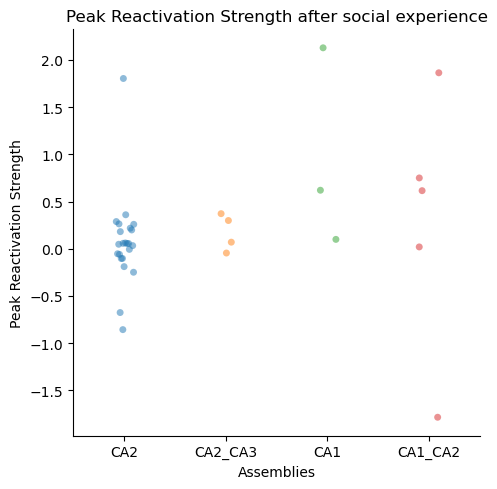

In [232]:
sns.catplot(data=Peak_Reactivation_Strength, jitter=True,  alpha=0.5)

# Overlay with the means using pointplot
#sns.pointplot(data=Peak_Reactivation_Strength, ci=None, markers="D",  scale=1.5)

# Customize the plot for better appearance
plt.title("Peak Reactivation Strength after social experience")
plt.xlabel("Assemblies")
plt.ylabel("Peak Reactivation Strength")
plt.xticks()
plt.grid(False)
plt.tight_layout()

plt.show()